In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("mtcars.csv")
cars.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   4.0   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   4.0   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   NaN   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   3.0   
4  Hornet Sportabout  18.7    8  360.0  175  3.15    NaN  17.02   0   0   3.0   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [3]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       3
qsec     0
vs       0
am       0
gear     2
carb     0
dtype: int64

In [4]:
cars['wt'].fillna(np.mean(cars['wt']), inplace = True)

In [5]:
cars['gear'].value_counts()

3.0    14
4.0    11
5.0     5
Name: gear, dtype: int64

In [6]:
cars['gear'].fillna(3.0,inplace = True)

In [7]:
cars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

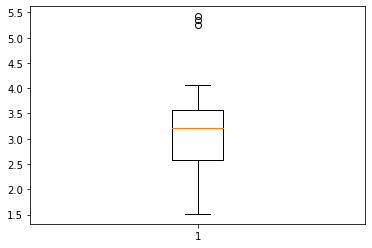

In [8]:
plt.boxplot(cars.wt)
plt.show()

In [9]:
cars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.207310   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.969924   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.207310   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.570000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.656250   2.8125  
std     1.786943   0.504016   0.498991   0.745281   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   3.500000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [10]:
iqr = 3.57 - 2.58                #Q3-Q1
high_limit = 3.57 + (1.5*iqr)    #Q3+1.5*IQR
low_limit = 2.58 - (1.5*iqr)     # Q1-1.5*IQR
print("IQR",iqr)
print("Upper valid Limit:",high_limit)
print("Lower valid limit:",low_limit)

IQR 0.9899999999999998
Upper valid Limit: 5.055
Lower valid limit: 1.0950000000000004


In [11]:
higher_outliers = cars[cars['wt']>5.05]
lower_outliers = cars[cars['wt']<1.09]

In [12]:
higher_outliers

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   

    gear  carb  
14   3.0     4  
15   3.0     4  
16   3.0     4

In [13]:
lower_outliers

Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb]
Index: []

In [17]:
#Replacing higher outliers with upper capping as 5 in weight column
for car in higher_outliers.index:
    cars.loc[car,'wt'] = 5.0
    print(cars.loc[car,'wt'])

5.0
5.0
5.0


In [19]:
higher_outliers = cars[cars['wt']>5.05]
higher_outliers

Empty DataFrame
Columns: [model, mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb]
Index: []

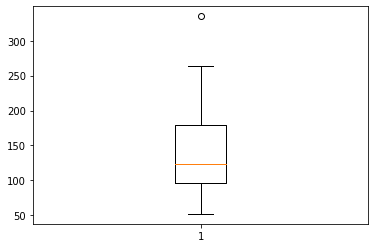

In [21]:
plt.boxplot(cars['hp'])
plt.show()